In [3]:
import os
os.environ["MODIN_ENGINE"] = "ray"

%matplotlib inline

import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [5]:

data = pd.read_csv("../data/boston_housing.csv")

data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
features = data.drop("PRICE", axis=1)
labels = data["PRICE"]

type(features)

modin.pandas.dataframe.DataFrame

In [7]:

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(features, labels)

LinearRegression()

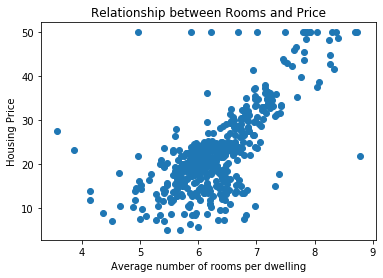

In [8]:

plt.scatter(data["RM"], labels)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between Rooms and Price")
plt.show()

In [9]:
predicted_prices = lm.predict(features)

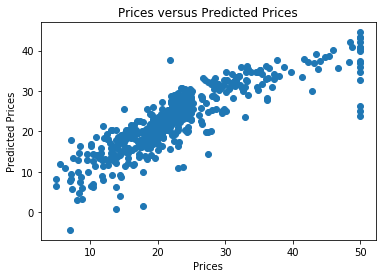

In [10]:
plt.scatter(labels, predicted_prices)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices versus Predicted Prices")
plt.show()

In [11]:
training_error = \
    (labels - predicted_prices).apply(lambda x: x ** 2).mean()

training_error

21.831934375295624